In [1]:
import pandas as pd
import json

In [2]:
d_therapy = json.load(open("data/therapyByUser.json"))
d_therapy

{'uwHCq88eD7UtYRexpuWqxw': {'cbt': {'toyFactory': [1560442439, 1560342868],
   'associationSort': [1560443923, 1560342582, 1560258201],
   'lostRecipe': [1560442169, 1560341177, 1560258658]},
  'relaxation': {'lullaby': [1560445371], 'coherentBreathing': [1560258533]},
  'trt': {'theIsland': [1560444429, 1560341469, 1560341672],
   'simons': [1560342217],
   'constellations': [1560341129]},
  'knowledge': {},
  'residualInhibition': {'keepTheShape': [1560442633, 1560257901],
   'smoothieBar': [1560444558, 1560342434, 1560258014]},
  'questionnaire': {'residualInhibitionDiagnosis': [1560444709,
    1560445431,
    1560257471],
   'acouphenometry': [1560444932, 1560257346, 1560257563]}},
 'SD-WxvJXQoIPxSTWQRHUOQ': {'cbt': {'lostRecipe': [1560443036,
    1560350858,
    1560412958,
    1560325994,
    1560268572,
    1560099017,
    1560013287,
    1559926422,
    1559979859,
    1559807409,
    1559751895,
    1559720345,
    1559665641,
    1559590925,
    1559634309,
    1559408404,
  

In [3]:
data_activity = {"user":[],"therapy":[],"activity":[],"time":[]}
for userKey in d_therapy:
    user = d_therapy[userKey]
    for therapyKey in user:
        therapy = user[therapyKey]
        for activityKey in therapy:
            activity = therapy[activityKey]
            for time in activity:
                data_activity["user"].append(userKey)
                data_activity["therapy"].append(therapyKey)
                data_activity["activity"].append(activityKey)
                data_activity["time"].append(time)

df = pd.DataFrame(data_activity)
(df.groupby("user")["therapy"].count()>50).value_counts()

False    477
True     120
Name: therapy, dtype: int64

In [4]:
time_sorted = df[(df["user"] == 'SD-WxvJXQoIPxSTWQRHUOQ') & (df["therapy"] == 'cbt') & (df["activity"] == 'lostRecipe')]["time"].sort_values()
if len(time_sorted) > 1:
    time_sorted = list(time_sorted)
    time_differencies = [(time_sorted[i+1]-time_sorted[i]) for i in range(len(time_sorted)-1)]
    print(sum(time_differencies)/len(time_differencies)/86400)

1.0288473915989158


In [5]:
!pip install progressbar2

In [7]:
def detect_change_activity(df):
    resu = [0]
    n = df.shape[0]
    for i in range(n-1):
        row = df.iloc[[i]]
        next_row = df.iloc[[i+1]]
        if row["user"].values != next_row["user"].values:
            resu.append(i+1)
        elif row["activity"].values != next_row["activity"].values:
            resu.append(i+1)
    if resu[-1] != n:
        resu.append(n)
    return resu

In [8]:
row=df.iloc[[0]]
row["user"].values[0]

'uwHCq88eD7UtYRexpuWqxw'

In [11]:
changes = detect_change_activity(df)

In [12]:
len(changes)
changes[0:2]

[0, 2]

In [15]:
def frequencies_from_dataframe(df):
#     changes = detect_change_activity(df)
    i=0
    d_frequency = {}
    for i in range(len(changes)-1):
        start, end = changes[i], changes[i+1]-1
        if end - start > 1:
            time_sorted = df["time"].iloc[start:end].sort_values(ascending=False)
            time_sorted = list(time_sorted)
            time_differencies = [(time_sorted[i]-time_sorted[i+1]) for i in range(len(time_sorted)-1)]
            time_differencies.sort()
            median = time_differencies[len(time_differencies) // 2]
            d_frequency[start]= median/86400
    return d_frequency

In [17]:
df_frequencies = frequencies_from_dataframe(df)
df_frequencies

{2: 1.1729282407407406,
 5: 1.1688888888888889,
 10: 1.1916666666666667,
 17: 1.1819907407407408,
 20: 0.008356481481481482,
 23: 2.1711342592592593,
 26: 0.71875,
 109: 0.6668287037037037,
 208: 0.6637731481481481,
 316: 0.6637037037037037,
 404: 1.1679861111111112,
 450: 1.1235532407407407,
 501: 1.9292013888888888,
 516: 0.6336574074074074,
 649: 0.6194791666666667,
 799: 1.0089699074074074,
 810: 0.6391319444444444,
 934: 1.0710300925925926,
 970: 1.1353472222222223,
 989: 1.061087962962963,
 995: 0.0006365740740740741,
 1006: 1.0530324074074073,
 1014: 1.176412037037037,
 1093: 1.1574652777777779,
 1169: 1.0572569444444444,
 1263: 0.6104050925925926,
 1406: 1.9811921296296295,
 1444: 1.8291087962962962,
 1489: 3.912673611111111,
 1496: 1.0154976851851851,
 1589: 1.1819444444444445,
 1669: 1.0570833333333334,
 1730: 1.1886342592592594,
 1807: 7.308842592592592,
 1812: 7.309988425925926,
 1822: 0.11240740740740741,
 1826: 2.068773148148148,
 1844: 2.3678125,
 1866: 1.033159722222222

In [18]:
def use_frequencies(df):
    d_frequency_row = frequencies_from_dataframe(df)
    d_frequency = {"user":[],"therapy":[],"activity":[],"frequency":[]}
    for row_id in d_frequency_row:
        row = df.iloc[[row_id]]
        d_frequency["user"].append(row["user"].values[0])
        d_frequency["therapy"].append(row["therapy"].values[0])
        d_frequency["activity"].append(row["activity"].values[0])
        d_frequency["frequency"].append(d_frequency_row[row_id])
    df_frequency = pd.DataFrame(d_frequency)
    return df_frequency

In [19]:
df_frequency = use_frequencies(df)
df_frequency.head(20)

user             therapy                     activity  \
0   uwHCq88eD7UtYRexpuWqxw                 cbt              associationSort   
1   uwHCq88eD7UtYRexpuWqxw                 cbt                   lostRecipe   
2   uwHCq88eD7UtYRexpuWqxw                 trt                    theIsland   
3   uwHCq88eD7UtYRexpuWqxw  residualInhibition                  smoothieBar   
4   uwHCq88eD7UtYRexpuWqxw       questionnaire  residualInhibitionDiagnosis   
5   uwHCq88eD7UtYRexpuWqxw       questionnaire               acouphenometry   
6   SD-WxvJXQoIPxSTWQRHUOQ                 cbt                   lostRecipe   
7   SD-WxvJXQoIPxSTWQRHUOQ                 cbt                   toyFactory   
8   SD-WxvJXQoIPxSTWQRHUOQ                 cbt              associationSort   
9   SD-WxvJXQoIPxSTWQRHUOQ          relaxation            coherentBreathing   
10  SD-WxvJXQoIPxSTWQRHUOQ          relaxation              squareBreathing   
11  SD-WxvJXQoIPxSTWQRHUOQ          relaxation                      lullaby   
12  SD-WxvJXQoIPxSTWQRHUOQ          relaxation           abdominalBreathing   
13  SD-WxvJXQoIPxSTWQRHUOQ                 trt               constellations   
14  SD-WxvJXQoIPxSTWQRHUOQ                 trt                    theIsland   
15  SD-WxvJXQoIPxSTWQRHUOQ                 trt                       simons   
16  SD-WxvJXQoIPxSTWQRHUOQ  residualInhibition                 keepTheShape   
17  SD-WxvJXQoIPxSTWQRHUOQ  residualInhibition                  smoothieBar   
18  SD-WxvJXQoIPxSTWQRHUOQ       questionnaire               acouphenometry   
19  UIOrcu0zFvlndLHEIVTWmw                 cbt              associationSort   

    frequency  
0    1.172928  
1    1.168889  
2    1.191667  
3    1.181991  
4    0.008356  
5    2.171134  
6    0.718750  
7    0.666829  
8    0.663773  
9    0.663704  
10   1.167986  
11   1.123553  
12   1.929201  
13   0.633657  
14   0.619479  
15   1.008970  
16   0.639132  
17   1.071030  
18   1.135347  
19   1.061088

In [20]:
df.head()

user therapy         activity        time
0  uwHCq88eD7UtYRexpuWqxw     cbt       toyFactory  1560442439
1  uwHCq88eD7UtYRexpuWqxw     cbt       toyFactory  1560342868
2  uwHCq88eD7UtYRexpuWqxw     cbt  associationSort  1560443923
3  uwHCq88eD7UtYRexpuWqxw     cbt  associationSort  1560342582
4  uwHCq88eD7UtYRexpuWqxw     cbt  associationSort  1560258201

In [21]:
import matplotlib.pyplot as plt
for user in list(df["user"].unique())[:100]:
    plt.hist(df[df["user"] == user]["time"])
plt.show()

<Figure size 640x480 with 1 Axes>

In [22]:
import time
import datetime
from datetime import datetime
t = time.time()
d = datetime.fromtimestamp(t).date()
d1 = datetime(2019,6,19)
d2 = datetime(2019,6,12)
(d2-d1).days

-7

In [23]:
def dict_days_activity(timestamps):
    d = {}
    for timestamp in timestamps:
        date = datetime.fromtimestamp(timestamp).date()
        if date in d.keys():
            d[date] += 1
        else:
            d[date] = 1
    return d
    

In [24]:
df_test = df.iloc[:500]
timestamps = df.iloc[26:108]["time"]
d_day = dict_days_activity(timestamps)
sum(d_day.values())/(max(d_day.keys())-min(d_day.keys())).days

1.1081081081081081

In [25]:
def frequencies_from_dataframe2(df):
    changes = detect_change_activity(df)
    d_frequency = {}
    for i in range(len(changes)-1):
        start, end = changes[i], changes[i+1]-1
        timestamps = df["time"].iloc[start:end]
        d_days = dict_days_activity(timestamps)
        try:
            max_day = max(d_days.keys())
            min_day = min(d_days.keys())
            if max_day != min_day:
                mean = sum(d_days.values())/(max_day-min_day).days
                d_frequency[start]= mean
        except:
            pass
    return d_frequency

In [26]:
frequencies_from_dataframe2(df_test)

{2: 2.0,
 5: 2.0,
 10: 2.0,
 17: 2.0,
 23: 1.0,
 26: 1.1081081081081081,
 109: 1.3066666666666666,
 208: 1.3717948717948718,
 316: 1.1012658227848102,
 404: 0.5487804878048781,
 450: 0.5903614457831325}

In [27]:
d_freq = json.load(open("data/data_frequency.json"))
d_activity = {}
users = d_freq["user"]
activities = d_freq["activity"]
frequencies = d_freq["frequency"]
for i in range(len(users)):
    user = users[i]
    activity = activities[i]
    frequency = frequencies[i]
    if user in d_activity.keys():
        d_activity[user][activity] = frequency
    else:
        d_activity[user] = {activity: frequency}
df_freq = pd.DataFrame(d_activity).transpose()
    

df_freq.describe()

abdominalBreathing  acouphenometry  associationSort  coherentBreathing  \
count           55.000000      279.000000       203.000000         145.000000   
mean             0.232393        0.178831         0.191018           0.135629   
std              0.209639        0.272228         0.333647           0.193446   
min              0.027027        0.006849         0.006711           0.007092   
25%              0.096875        0.026316         0.030077           0.027778   
50%              0.131579        0.071429         0.071429           0.050000   
75%              0.307692        0.225694         0.186932           0.158940   
max              1.000000        2.000000         3.000000           1.205128   

       constellations  keepTheShape  lostRecipe     lullaby  \
count      192.000000    189.000000  177.000000  210.000000   
mean         0.158483      0.195729    0.192051    0.215547   
std          0.222649      0.373112    0.448553    0.297236   
min          0.007407      0.007299    0.007299    0.007246   
25%          0.022347      0.026316    0.025641    0.031788   
50%          0.081537      0.083333    0.076923    0.091966   
75%          0.200725      0.204918    0.214286    0.250000   
max          1.571429      3.000000    5.000000    1.700000   

       residualInhibitionDiagnosis     simons  smoothieBar  squareBreathing  \
count                   104.000000  52.000000   179.000000       129.000000   
mean                      0.132060   0.232520     0.184848         0.137481   
std                       0.307568   0.199199     0.268995         0.165010   
min                       0.006803   0.043478     0.007576         0.007407   
25%                       0.020625   0.119412     0.032129         0.021583   
50%                       0.035294   0.200000     0.095588         0.069565   
75%                       0.111111   0.294512     0.226823         0.212766   
max                       2.000000   1.125000     1.800000         0.921053   

        theIsland  toyFactory  
count  203.000000  190.000000  
mean     0.184794    0.153903  
std      0.253993    0.282505  
min      0.006757    0.006944  
25%      0.034724    0.020833  
50%      0.089552    0.060911  
75%      0.233032    0.164713  
max      1.773810    2.727273

In [4]:
from sklearn.cluster import KMeans
from project.extract import dataframe_activity_frequency
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

df_freq = dataframe_activity_frequency()

# users_2 = PCA(n_components=2).fit_transform(df_freq)

kmeans = KMeans(n_clusters=3).fit(df_freq)
df_freq["labels"] = kmeans.labels_
df_label_mean = df_freq.groupby("labels").median()
df_q = df_freq.groupby("labels").quantile([.25,.5,.75])
df_label_stde = df_freq.groupby("labels").agg("std")
df_q.loc[0].loc[0.25].head()

acouphenometry     0.020261
associationSort    0.041783
constellations     0.052668
keepTheShape       0.062182
lostRecipe         0.062194
Name: 0.25, dtype: float64

In [9]:
df_freq["labels"].value_counts()

0    70
2    11
1     1
Name: labels, dtype: int64

In [11]:
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np

py.init_notebook_mode()

data = [
    go.Scatter(x=df_q.columns, y=df_label_mean.loc[i],
               error_y={
                   "type":"data",
                   "array":df_label_stde.loc[i],
                   "visible":True
               })
for i in [0,2,1]]

py.iplot(data)

In [5]:
df_freq.head()

acouphenometry  associationSort  constellations  \
SD-WxvJXQoIPxSTWQRHUOQ        0.214286         1.354430        1.571429   
6KSiIbJcpy_0n7hjD5-e6w        0.035088         0.684211        0.814159   
o9OEo_mmf_z7MGvE4oizKg        0.120879         0.275862        0.193182   
gsRPgU-Sn8n4pgync8a9Fw        0.431818         0.358974        0.250000   
dczhJHKwh4w3StYzNR2g3A        0.242647         0.132353        0.240876   

                        keepTheShape  lostRecipe   lullaby  smoothieBar  \
SD-WxvJXQoIPxSTWQRHUOQ      1.464286    1.093333  0.595238     0.426829   
6KSiIbJcpy_0n7hjD5-e6w      0.660870    0.815789  1.256637     0.521739   
o9OEo_mmf_z7MGvE4oizKg      0.375000    0.238636  1.147727     0.562500   
gsRPgU-Sn8n4pgync8a9Fw      0.186047    0.214286  0.375000     0.219512   
dczhJHKwh4w3StYzNR2g3A      0.255474    0.179856  0.971223     0.306569   

                        theIsland  toyFactory  labels  
SD-WxvJXQoIPxSTWQRHUOQ   1.773810    1.289474       1  
6KSiIbJcpy_0n7hjD5-e6w   0.699115    0.663717       1  
o9OEo_mmf_z7MGvE4oizKg   0.130952    0.193182       0  
gsRPgU-Sn8n4pgync8a9Fw   0.166667    0.075000       0  
dczhJHKwh4w3StYzNR2g3A   0.204380    0.139706       0

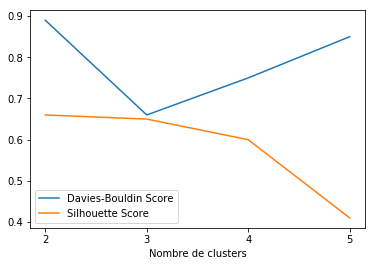

In [11]:
import matplotlib.pyplot as plt
n_clusters = [2,3,4,5]
db_score = [0.89,0.66,0.75,0.85]
sil_score = [0.66,0.65,0.6,0.41]
plt.plot(n_clusters,db_score,label="Davies-Bouldin Score")
plt.plot(n_clusters,sil_score,label="Silhouette Score")
plt.xticks(n_clusters)
plt.xlabel("Nombre de clusters")
plt.legend()
plt.show()